# 1. SarsaとQ学習で迷路ゲーム

## 演習 1-1. インポート

以下に従って，パッケージをインポートしなさい.
1. numpyをnpとしてインポート
2. matplotlib.pyplotをpltとしてインポート
3. matplotlibからanimiationをインポート
4. IPython.displayからHTMLををインポート

### 解答

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

## 演習 1-2. 3x3迷路の作成

第4回 2.の演習と同じ，以下の３x3マス迷路の図を作成しなさい．

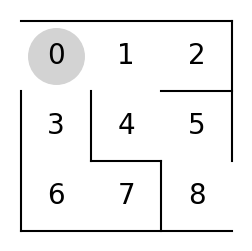

### 解答

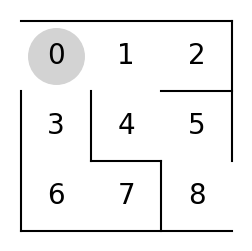

In [ ]:
fig = plt.figure(figsize=(3, 3))

plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

# 数字
# 各マス目の真ん中に数字を書きます
for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')


# 円
# スタート地点に灰色の円を書きます
circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

# 目盛りと枠は非表示します
plt.tick_params(axis='both', which='both', bottom=None, top= None, labelbottom=None, right=None, left=None, labelleft=None)
plt.box(None)

## 演習 1-3. パラメータ$\theta$の初期化

第4回 2.の演習と同じ形式で，パラメータ$\theta$の初期値を準備しなさい．

### 解答

In [ ]:
# パラメータθの初期値の準備
# np.nanはnumpyの欠損値
X = np.nan
theta_0 = np.array([
# 第１要素から第４要素まで，時計回りに上,右,下,左方向に移動できるかを記述
# 移動できる場合は，1を入れる
# 移動できない場合は，上で定義したX(=np.nan)
    [X, 1, 1, X], # 0 上,右,下,左
    [X, 1, 1, 1], # 1
    [X, X, X, 1], # 2
    [1, X, 1, X], # 3
    [1, 1, X, X], # 4
    [X, X, 1, 1], # 5
    [1, 1, X, X], # 6
    [X, X, X, 1]]) # 7

## 演習 1-4. 方策get_piメソッド

第4回 2.の演習を参考に，パラメータ$\theta$を方策に変換する関数get_piを作りなさい．

ただし，ここではソフトマックス関数ではなく，単純なパラメータの割合
$\pi (s,a) = \cfrac{\theta (s,a)}{\sum\limits_{a'} \theta (s,a')}$
で変換すること．

(ただし，$s$は状態，$a$と$a'$は行動，$a'$の和は壁がない方向の行動(実行可能な行動)のみをとる. )

### 解答

In [ ]:
def get_pi(theta):
    [m, n] = theta.shape # mは迷路のマス目数，nは行動数．今回はそれぞれ8と4
    pi = np.zeros((m, n))
    for i in range(m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi) # numpyの欠損値nanを数値に変換する
    return pi

## 演習 1-4' debug

パラメータ$\theta$の初期値が方策にどのように変換されたか確認してみる

*動作確認用コード*

```python
# パラメータθの初期値を方策にどのように変換されたか確認してみる
print("theta_0:")
print(theta_0)
pi_0 = get_pi(theta_0)
print()
print("pi_0:")
print(pi_0)
```

*期待される出力*

```
theta_0:
[[nan  1.  1. nan]
 [nan  1.  1.  1.]
 [nan nan nan  1.]
 [ 1. nan  1. nan]
 [ 1.  1. nan nan]
 [nan nan  1.  1.]
 [ 1.  1. nan nan]
 [nan nan nan  1.]]

pi_0:
[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]
```

### 解答

In [ ]:
# パラメータθの初期値を方策にどのように変換されたか確認してみる
print("theta_0:")
print(theta_0)
pi_0 = get_pi(theta_0)
print()
print("pi_0:")
print(pi_0)

theta_0:
[[nan  1.  1. nan]
 [nan  1.  1.  1.]
 [nan nan nan  1.]
 [ 1. nan  1. nan]
 [ 1.  1. nan nan]
 [nan nan  1.  1.]
 [ 1.  1. nan nan]
 [nan nan nan  1.]]

pi_0:
[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


## 演習 1-5. 行動価値関数$Q$の初期化

以下の要件で，行動価値関数$Q$を初期化しなさい．

要件 1. Qはtheta_0と同じサイズの配列．

要件 2. Qはtheta_0の各成分に0~1の乱数をかけたもの．

(これで，壁方向の行動価値がnanになる行動価値関数Qを生成することができる．)

### 解答

In [ ]:
Q = np.zeros_like(theta_0)
Q = theta_0 * np.random.rand(8, 4)

## 演習1-5' debug

$Q$を確認してみる

*動作確認用コード*

```python
print(Q) #Qを確認する
```

*期待される出力の例*

```
[[       nan 0.50714143 0.54876655        nan]
 [       nan 0.55451715 0.1099404  0.42826473]
 [       nan        nan        nan 0.75990082]
 [0.23456384        nan 0.91923048        nan]
 [0.76434943 0.98732901        nan        nan]
 [       nan        nan 0.83465333 0.29866309]
 [0.29762196 0.86708653        nan        nan]
 [       nan        nan        nan 0.89617796]]
```

### 解答

In [ ]:
print(Q) #Qを確認する

[[       nan 0.15356858 0.36927495        nan]
 [       nan 0.26127303 0.00574576 0.15652328]
 [       nan        nan        nan 0.06284748]
 [0.52620147        nan 0.313548          nan]
 [0.65134802 0.96921384        nan        nan]
 [       nan        nan 0.90143145 0.27556474]
 [0.02932746 0.035647          nan        nan]
 [       nan        nan        nan 0.44236452]]


## 演習 1-6. get_s_nextメソッド

第4回 2.の演習と同様，行動に従って次の状態を取得する関数
```get_s_next(s,a)```
を作りなさい．




### 解答

In [ ]:
def get_s_next(s, a):
    if a == 0: # 上 (0~8でマスを表現しているので，上に移動する際は-3とする)
                 # 注: すでに位置がs=0などにあるとき，s-3=-3となるが，それを選択する確率は0より，下限を超える点は気にしなくて良い
        return s - 3
    elif a == 1: # 右
        return s + 1
    elif a == 2: # 下 (0~8でマスを表現しているので，下に移動する際は+3とする)
                 # 注: すでに位置がs=8などにあるとき，s+3=11となるが，それを選択する確率は0より，上限を超える点は気にしなくて良い
        return s + 3
    elif a == 3: # 左
        return s - 1

## 演習 1-7. get_aメソッド

$\epsilon$-greedy法によって，
ランダムまたは行動価値関数に従って行動を取得する関数
```get_a(s, Q, epsilon, pi_0)```
を完成させなさい．


要件 1. 引数は，状態s, 行動価値関数Q, $\epsilon$-greedy法のepsilon, 方策pi_0とする．

要件 2. もし0~1の乱数がepsilon以下なら，方策pi_0の確率に従い行動を選択し，それをreturnする．(第4回 2.演習2-3.を参考)

要件 3. 要件2.で生成した乱数がepsilonよりも大きいなら，以下の要件3-1,3-2を行う．

要件 3-1. Q[s]がすべてnanなら，，方策pi_0の確率に従い行動を選択し，それをreturnする．(第4回 2.演習2-3.を参考)

要件 3-2. 状態$s$に対する行動価値関数のリストQ[s]から， 行動価値が最大となるインデックス(=行動)をreturnする．

(要件3のヒント: np.nanargmax()関数を使うと，NaN値を無視し、特定の軸の配列の最大要素のインデックスを返すことができる．)

### 解答

In [ ]:
def get_a(s, Q, epsilon, pi_0):
    if np.random.rand() <= epsilon:
        return np.random.choice([0,1,2,3], p=pi_0[s])

    if np.all(np.isnan(Q[s])):
        return np.random.choice([0,1,2,3], p=pi_0[s])

    return np.nanargmax(Q[s])

## 演習1-7' debug

*動作確認用コード*

```python
print("Q[1]:\n", Q[1])
print("pi_0[1]:\n", pi_0[1])
print(get_a(1, Q, 0, pi_0))
print(get_a(1, Q, 1, pi_0))
```

*期待される出力の例"
```
Q[1]:
 [       nan 0.84908933 0.62542517 0.33421339]
pi_0[1]:
 [0.         0.33333333 0.33333333 0.33333333]
epsilon=0: 1
epsilon=1: 1
```

### 解答

In [ ]:
print("Q[1]:\n", Q[1])
print("pi_0[1]:\n", pi_0[1])
print(get_a(1, Q, 0, pi_0))
print(get_a(1, Q, 1, pi_0))

Q[1]:
 [       nan        nan 0.00574576 0.15652328]
pi_0[1]:
 [0.         0.33333333 0.33333333 0.33333333]
3
2


## 演習 1-8. SARSAメソッド

Sarsaによる行動価値関数の更新は，次の通り．

$$ Q (s_t, a_t) \leftarrow
Q (s_t, a_t)  + \eta [
R_{t+1} + \gamma \times Q(s_{t+1},a_{t+1}) - Q(s_{t},a_{t})
]$$

Sarsaによる行動価値関数の更新を与える関数
```sarsa(s, a, r, s_next, a_next, Q)```
を作成しなさい．

この関数は，
状態s, 行動a, 得られる報酬r, 次ステップの状態s_next, 次ステップの行動a_next, 行動価値関数Qが与えられたとき，行動価値関数Qを更新してreturnする関数である．

ヒント: Q[s, a], Q[s_next, a_next], r, eta, gammaを使って，更新すれば良い．


ただし，以下のようにすること
- 学習係数etaは0.1とする
- 割引率gammaは0.9とする

また，
もしs_nextが8の場合は，ゴールのため次ステップは存在しない．
そこで，$\gamma \times Q(s_{t+1},a_{t+1}) $の項は落としたものを使う．

### 解答

In [ ]:
def sarsa(s, a, r, s_next, a_next, Q):
    eta = 0.1
    gamma = 0.9
    if s_next == 8:
        Q[s, a] += eta * (r - Q[s, a])
        return Q
    Q[s, a] += eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q


## 演習 1-8' debug

sarsaメソッドの確認をする．

*動作確認用コード*
```python
print(sarsa(1, 1, 5, 2, 1, Q))
```

*期待される出力の例*

```
[[       nan 0.57919631 0.45093374        nan]
 [       nan        nan 0.62542517 0.33421339]
 [       nan        nan        nan 0.18227253]
 [0.87409069        nan 0.95013025        nan]
 [0.02725674 0.77773385        nan        nan]
 [       nan        nan 0.264209   0.65244875]
 [0.3172799  0.92203101        nan        nan]
 [       nan        nan        nan 0.41111956]]
```

### 解答

In [ ]:
print(sarsa(1, 1, 5, 2, 1, Q))

[[       nan 0.15356858 0.36927495        nan]
 [       nan        nan 0.00574576 0.15652328]
 [       nan        nan        nan 0.06284748]
 [0.52620147        nan 0.313548          nan]
 [0.65134802 0.96921384        nan        nan]
 [       nan        nan 0.90143145 0.27556474]
 [0.02932746 0.035647          nan        nan]
 [       nan        nan        nan 0.44236452]]


## 演習 1-9. playメソッド

1エピソード実行して履歴を取得する関数playを完成させなさい．

```python
# 1エピソードの実行
def play(Q, epsilon, pi):
    s = 0 # 状態 マス目0からスタート
    a = a_next = get_a(s, Q, epsilon, pi) # 行動の初期値 get_a関数から取得
    s_a_history = [[0, np.nan]] # 状態と行動の履歴 状態の初期値はスタート地点，行動の初期値はnp.nan

    # エピソード完了までループ
    while True:

#### ここを自分で書く ######
        # 行動aにa_nextを代入
        # 状態s_nextに，get_s_next関数の戻り値を代入．引数は状態sと上の行動a．

#### ここまで ######

        # 履歴の更新
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

#### ここを自分で書く ######
        # 以下のようにして，報酬と，行動価値関数Qに従った行動を与える．
        # もしs_nextが8なら，報酬rに1を, 次の行動a_nextにnp.nanを代入する．
        # それ以外は，報酬rに0を, 次の行動a_nextにget_a関数の戻り値を代入する
        # get_a関数の第一引数の状態は, 次状態s_nextとすれば良い．

#### ここまで ######

#### ここを自分で書く ######
        # sarsaによって，行動価値関数を更新しなさい．

#### ここまで ######

        # 終了判定
        if s_next == 8:
            break
        else:
            s = s_next

    # 履歴と行動価値関数を返す
    return [s_a_history, Q]
```

### 解答

In [ ]:
# 1エピソードの実行
def play(Q, epsilon, pi):
    s = 0 # 状態 マス目0からスタート
    a = a_next = get_a(s, Q, epsilon, pi) # 行動の初期値 get_a関数から取得
    s_a_history = [[0, np.nan]] # 状態と行動の履歴 状態の初期値はスタート地点，行動の初期値はnp.nan

    # エピソード完了までループ
    while True:

#### ここを自分で書く ######
        # 行動aにa_nextを代入
        # 状態s_nextに，get_s_next関数の戻り値を代入．引数は状態sと上の行動a．
        a = a_next
        s_next = get_s_next(s, a)

#### ここまで ######

        # 履歴の更新
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

#### ここを自分で書く ######
        # 以下のようにして，報酬と，行動価値関数Qに従った行動を与える．
        # もしs_nextが8なら，報酬rに1を, 次の行動a_nextにnp.nanを代入する．
        # それ以外は，報酬rに0を, 次の行動a_nextにget_a関数の戻り値を代入する
        # get_a関数の第一引数の状態は, 次状態s_nextとすれば良い．
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_a(s_next, Q, epsilon, pi)

#### ここまで ######

#### ここを自分で書く ######
        # sarsaによって，行動価値関数を更新しなさい．
        Q = sarsa(s, a, r, s_next, a_next, Q)

#### ここまで ######

        # 終了判定
        if s_next == 8:
            break
        else:
            s = s_next

    # 履歴と行動価値関数を返す
    return [s_a_history, Q]

## 演習1-9' debug I

playメソッドの動作確認をする．

*動作確認用コード*
```python
print(play(Q, 0.5, pi_0))
```

*期待される出力例*
```
[[[0, np.int64(2)], [3, np.int64(0)], [0, np.int64(1)], [1, np.int64(1)], [2, np.int64(3)], [1, np.int64(3)], [0, np.int64(1)], [1, np.int64(1)], [2, np.int64(3)], [1, np.int64(2)], [4, np.int64(1)], [5, np.int64(2)], [8, nan]], array([[       nan,        nan, 0.14548258,        nan],
       [       nan,        nan, 0.17984286,        nan],
       [       nan,        nan,        nan, 0.76979527],
       [0.50623465,        nan, 0.13733893,        nan],
       [0.49704783, 0.84058866,        nan,        nan],
       [       nan,        nan, 0.98277825, 0.16073588],
       [0.05288601, 0.05024877,        nan,        nan],
       [       nan,        nan,        nan, 0.41537932]])]
```

### 解答

In [ ]:
print(play(Q, 0.5, pi_0))

[[[0, np.int64(2)], [3, np.int64(0)], [0, np.int64(1)], [1, np.int64(2)], [4, np.int64(1)], [5, np.int64(2)], [8, nan]], array([[       nan, 0.13872884, 0.37970558,        nan],
       [       nan,        nan, 0.09240043, 0.15652328],
       [       nan,        nan,        nan, 0.06284748],
       [0.48740249,        nan, 0.313548  ,        nan],
       [0.65134802, 0.95342129,        nan,        nan],
       [       nan,        nan, 0.91128831, 0.27556474],
       [0.02932746, 0.035647  ,        nan,        nan],
       [       nan,        nan,        nan, 0.44236452]])]


## 演習1-9'' debug II

10エピソードでsarsaによる学習を行う

*動作確認用コード*

```python
epsilon = 0.5  # ε-greedy法のεの初期値

# エピソードを繰り返し実行して学習
for episode in range(10):

    # 1エピソード実行して履歴と行動価値関数を取得
    [s_a_history, Q] = play(Q, epsilon, pi_0)

    # 出力
    print('エピソード: {}, ステップ: {}'.format(episode, len(s_a_history)-1))

# アニメーションの処理を行う関数
def animate(i):
    state = s_a_history[i][0]
    circle.set_data([(state % 3) + 0.5], [2.5 - int(state / 3)])
    return circle

# アニメーションの表示
anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())
```

*期待される出力の例*
```
エピソード: 0, ステップ: 92
エピソード: 1, ステップ: 4
エピソード: 2, ステップ: 50
エピソード: 3, ステップ: 70
エピソード: 4, ステップ: 20
エピソード: 5, ステップ: 6
エピソード: 6, ステップ: 6
エピソード: 7, ステップ: 4
エピソード: 8, ステップ: 6
エピソード: 9, ステップ: 4
*この下にアニメーションが出力される
```

### 解答

In [ ]:
epsilon = 0.5  # ε-greedy法のεの初期値

# エピソードを繰り返し実行して学習
for episode in range(10):

    # 1エピソード実行して履歴と行動価値関数を取得
    [s_a_history, Q] = play(Q, epsilon, pi_0)

    # 出力
    print('エピソード: {}, ステップ: {}'.format(episode, len(s_a_history)-1))

# アニメーションの処理を行う関数
def animate(i):
    state = s_a_history[i][0]
    circle.set_data([(state % 3) + 0.5], [2.5 - int(state / 3)])
    return circle

# アニメーションの表示
anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

エピソード: 0, ステップ: 8
エピソード: 1, ステップ: 314
エピソード: 2, ステップ: 66
エピソード: 3, ステップ: 14
エピソード: 4, ステップ: 8
エピソード: 5, ステップ: 10
エピソード: 6, ステップ: 4
エピソード: 7, ステップ: 12
エピソード: 8, ステップ: 4
エピソード: 9, ステップ: 6


方策のパラメータををリセットする．(新しく学習する際は必要)

```python
# パラメータθの初期化を行う．
pi_0 = get_pi(theta_0)
[a, b] = theta_0.shape
Q = np.random.rand(a, b) *theta_0
```

In [ ]:
# パラメータθの初期化を行う．
pi_0 = get_pi(theta_0)
[a, b] = theta_0.shape
Q = np.random.rand(a, b) *theta_0

## 演習 1-10. $\epsilon$-greedy法

上のプログラムでは，$\epsilon$-greedy法で，パラメータ$\epsilon=0.5$のため，50%の確率でランダムな手を打っている．そのため，学習した結果を効率的に取り込めていない．

1エピソードごとにepislonの値を半分にしてsarsaによる学習をし，得られた結果をアニメーションにして確認しなさい．

10エピソードで，寄り道することなくゴールに辿り着けるようになるはずである．
（もしならなかったら，もういちど方策を初期化して実行しなおすと良い．）


### 解答

In [ ]:
epsilon = 0.5  # ε-greedy法のεの初期値

# エピソードを繰り返し実行して学習
for episode in range(10):

    # 1エピソード実行して履歴と行動価値関数を取得
    [s_a_history, Q] = play(Q, epsilon, pi_0)

    # 出力
    print('エピソード: {}, ステップ: {}'.format(episode, len(s_a_history)-1))
    epsilon /= 2.0

# アニメーションの処理を行う関数
def animate(i):
    state = s_a_history[i][0]
    circle.set_data([(state % 3) + 0.5], [2.5 - int(state / 3)])
    return circle

# アニメーションの表示
anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

エピソード: 0, ステップ: 10
エピソード: 1, ステップ: 4
エピソード: 2, ステップ: 4
エピソード: 3, ステップ: 6
エピソード: 4, ステップ: 8
エピソード: 5, ステップ: 4
エピソード: 6, ステップ: 4
エピソード: 7, ステップ: 4
エピソード: 8, ステップ: 4
エピソード: 9, ステップ: 4


## 演習 1-11. Q学習

Q学習による行動価値関数の更新は，以下通りである．

$$ Q (s_t, a_t) \leftarrow
Q (s_t, a_t)  + \eta [
R_{t+1} + \gamma \times \max\limits_a Q(s_{t+1},a_{t+1}) - Q(s_{t},a_{t})
]$$

Q学習による行動価値関数の更新を与える関数
```q_learning(s, a, r, s_next, a_next, Q)```
を作成しなさい．

この関数は，
状態s, 行動a, 得られる報酬r, 次ステップの状態s_next, 次ステップの行動a_next, 行動価値関数Qが与えられたとき，行動価値関数Qを更新してreturnする関数である．

ヒント: $\max\limits_a \, Q(s_{t+1},a_{t+1})$は，NaN値を無視して最大値を返すnp.nanmaxを使う．



ただし，以下のようにすること
- 学習係数etaは0.1とする
- 割引率gammaは0.9とする

また，
もしs_nextが8の場合は，ゴールのため次ステップは存在しない．
そこで，$ \gamma \times \max\limits_a \, Q(s_{t+1},a_{t+1})$の項は落としたものを使う．

### 解答

In [ ]:
def q_learning(s, a, r, s_next, a_next, Q):
    eta = 0.1
    gamma = 0.9
    if s_next == 8:
        Q[s, a] += eta * (r - Q[s, a])
        return Q
    Q[s, a] += eta * (r + gamma * np.nanmax(Q[s_next, a_next]) - Q[s, a])
    return Q

## 演習 1-12. Q学習用playQメソッド

演習 1-9.のplay関数について，sarsaをQ学習に置き換えたplayQ関数を作りなさい．


### 解答

In [ ]:
def playQ(Q, epsilon, pi):
    s = 0 # 状態 マス目0からスタート
    a = a_next = get_a(s, Q, epsilon, pi) # 行動の初期値 get_a関数から取得
    s_a_history = [[0, np.nan]] # 状態と行動の履歴 状態の初期値はスタート地点，行動の初期値はnp.nan

    # エピソード完了までループ
    while True:

        a = a_next
        s_next = get_s_next(s, a)

        # 履歴の更新
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_a(s_next, Q, epsilon, pi)

        # 行動価値関数を更新
        Q = q_learning(s, a, r, s_next, a_next, Q)

        # 終了判定
        if s_next == 8:
            break
        else:
            s = s_next

    # 履歴と行動価値関数を返す
    return [s_a_history, Q]

方策のパラメータををリセットする．(新しく学習する際は必要)

```python
# パラメータθの初期化を行う．
pi_0 = get_pi(theta_0)
[a, b] = theta_0.shape
Q = np.random.rand(a, b) *theta_0
```

In [ ]:
# パラメータθの初期化を行う．
pi_0 = get_pi(theta_0)
[a, b] = theta_0.shape
Q = np.random.rand(a, b) *theta_0

## 演習 1-13. Q学習デモ

演習1-10.のplayをplayQに置き換えて，Q学習を実行し，得られた結果をアニメーションにして確認しなさい．

### 解答

In [ ]:
epsilon = 0.5  # ε-greedy法のεの初期値

# エピソードを繰り返し実行して学習
for episode in range(10):

    # 1エピソード実行して履歴と行動価値関数を取得
    [s_a_history, Q] = playQ(Q, epsilon, pi_0)

    # 出力
    print('エピソード: {}, ステップ: {}'.format(episode, len(s_a_history)-1))
    epsilon /= 2.0

# アニメーションの処理を行う関数
def animate(i):
    state = s_a_history[i][0]
    circle.set_data([(state % 3) + 0.5], [2.5 - int(state / 3)])
    return circle

# アニメーションの表示
anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

エピソード: 0, ステップ: 96
エピソード: 1, ステップ: 216
エピソード: 2, ステップ: 12
エピソード: 3, ステップ: 4
エピソード: 4, ステップ: 4
エピソード: 5, ステップ: 4
エピソード: 6, ステップ: 4
エピソード: 7, ステップ: 4
エピソード: 8, ステップ: 4
エピソード: 9, ステップ: 4


## 演習 1-14. 5x5迷路

第4回 2.の演習2-9で扱った以下の5x5マス迷路に対して，Q学習を適用して，寄り道せずにゴールまで辿り着くアニメーションを作成しなさい．

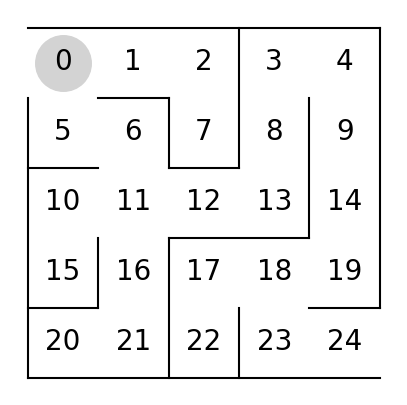

### 解答

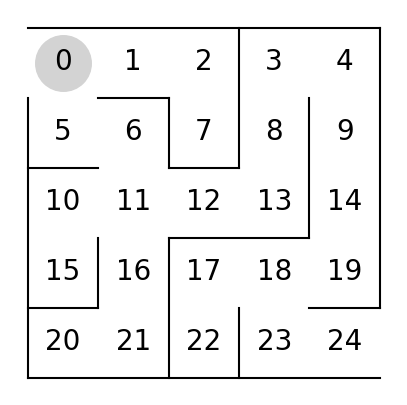

In [ ]:
# 迷路の作成
fig_5x5 = plt.figure(figsize=(5, 5))

# 壁
plt.plot([0, 5], [0, 0], color='k')
plt.plot([0, 5], [5, 5], color='k')
plt.plot([0, 0], [0, 4], color='k')
plt.plot([5, 5], [1, 5], color='k')

plt.plot([2, 2], [0, 2], color='k')
plt.plot([2, 4], [2, 2], color='k')
plt.plot([4, 4], [2, 4], color='k')
plt.plot([3, 3], [3, 5], color='k')

plt.plot([3, 3], [0, 1], color='k')
plt.plot([0, 1], [1, 1], color='k')
plt.plot([4, 5], [1, 1], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([0, 1], [3, 3], color='k')
plt.plot([2, 3], [3, 3], color='k')
plt.plot([2, 2], [3, 4], color='k')
plt.plot([1, 2], [4, 4], color='k')

# 数字
# 各マス目の真ん中に数字を書きます
for i in range(5):
    for j in range(5):
        plt.text(0.5+i, 4.5-j, str(i+j*5), size=20, ha='center', va='center')

# 円
# スタート地点に灰色の円を書きます
circle, = plt.plot([0.5], [4.5], marker='o', color='#d3d3d3', markersize=40)

# 目盛りと枠は非表示します
plt.tick_params(axis='both', which='both', bottom=None, top= None, labelbottom=None, right=None, left=None, labelleft=None)
plt.box(None)

# 上右下左
X = np.nan
theta_0_5x5 = np.array([
    [X, 1, 1, X], # 0
    [X, 1, X, 1], # 1
    [X, X, 1, 1], # 2
    [X, 1, 1, X], # 3
    [X, X, 1, 1], # 4
    [1, 1, X, X], # 5
    [X, X, 1, 1], # 6
    [1, X, X, X], # 7
    [1, X, 1, X], # 8
    [1, X, 1, X], # 9
    [X, 1, 1, X], # 10
    [1, 1, 1, 1], # 11
    [X, 1, X, 1], # 12
    [1, X, X, 1], # 13
    [1, X, 1, X], # 14
    [1, X, X, X], # 15
    [1, X, 1, X], # 16
    [X, 1, 1, X], # 17
    [X, 1, 1, 1], # 18
    [1, X, X, 1], # 19
    [X, 1, X, X], # 20
    [1, X, X, 1], # 21
    [1, X, X, X], # 22
    [1, 1, X, X], # 23
])


In [ ]:
def get_s_next_5x5(s, a):
    if a == 0: # 上
        return s - 5
    elif a == 1: # 右
        return s + 1
    elif a == 2: # 下
        return s + 5
    elif a == 3: # 左
        return s - 1

def playQ_5x5(Q, epsilon, pi):
    s = 0 # 状態 マス目0からスタート
    a = a_next = get_a(s, Q, epsilon, pi) # 行動の初期値 get_a関数から取得
    s_a_history = [[0, np.nan]] # 状態と行動の履歴 状態の初期値はスタート地点，行動の初期値はnp.nan

    # エピソード完了までループ
    while True:
        a = a_next
        s_next = get_s_next_5x5(s, a)

        # 履歴の更新
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

        if s_next == 24:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_a(s_next, Q, epsilon, pi)

        # 行動価値関数を更新
        Q = q_learning(s, a, r, s_next, a_next, Q)

        # 終了判定
        if s_next == 24:
            break
        else:
            s = s_next

    # 履歴と行動価値関数を返す
    return [s_a_history, Q]

def q_learning(s, a, r, s_next, a_next, Q):
    eta = 0.3
    gamma = 0.9
    if s_next == 24:
        Q[s, a] += eta * (r - Q[s, a])
        return Q
    Q[s, a] += eta * (r + gamma * np.nanmax(Q[s_next, a_next]) - Q[s, a])
    return Q


In [ ]:
# パラメータθの初期化を行う．
pi_0_5x5 = get_pi(theta_0_5x5)
[a, b] = theta_0_5x5.shape
Q = np.random.rand(a, b) * theta_0_5x5

epsilon = 0.5  # ε-greedy法のεの初期値

# エピソードを繰り返し実行して学習
for episode in range(20):

    # 1エピソード実行して履歴と行動価値関数を取得
    [s_a_history, Q] = playQ_5x5(Q, epsilon, pi_0_5x5)

    # 出力
    print('エピソード: {}, ステップ: {}'.format(episode, len(s_a_history)-1))
    epsilon /= 2.0

# アニメーションの処理を行う関数
def animate_5x5(i):
    state = s_a_history[i][0]
    circle.set_data([(state % 5) + 0.5], [4.5 - int(state / 5)])
    return circle

# アニメーションの表示
plt.close(fig_5x5)
anim = animation.FuncAnimation(fig_5x5, animate_5x5, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

エピソード: 0, ステップ: 472
エピソード: 1, ステップ: 414
エピソード: 2, ステップ: 62
エピソード: 3, ステップ: 20
エピソード: 4, ステップ: 24
エピソード: 5, ステップ: 26
エピソード: 6, ステップ: 16
エピソード: 7, ステップ: 16
エピソード: 8, ステップ: 14
エピソード: 9, ステップ: 14
エピソード: 10, ステップ: 14
エピソード: 11, ステップ: 14
エピソード: 12, ステップ: 14
エピソード: 13, ステップ: 14
エピソード: 14, ステップ: 14
エピソード: 15, ステップ: 14
エピソード: 16, ステップ: 14
エピソード: 17, ステップ: 14
エピソード: 18, ステップ: 14
エピソード: 19, ステップ: 14
